In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from EM import EM

%matplotlib inline

In [2]:
# read the image
img = plt.imread('./corgi.png')[:, :, :3]

In [3]:
# define colors in a hash table
colors = {1: 'b', 2: 'g', 3: 'r', 4: 'c', 5: 'm', 6: 'y', 7: 'k', 8: '#FF7F50', 9: '#FFA500', 10: '#006400'}

In [4]:
# reshape the input vector
x = np.reshape(img, (-1, 3))

Break, reach the threshold at 29 th iteration !


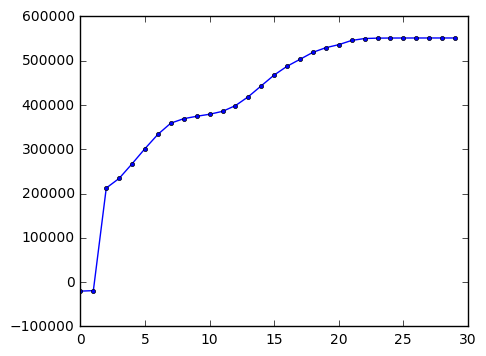

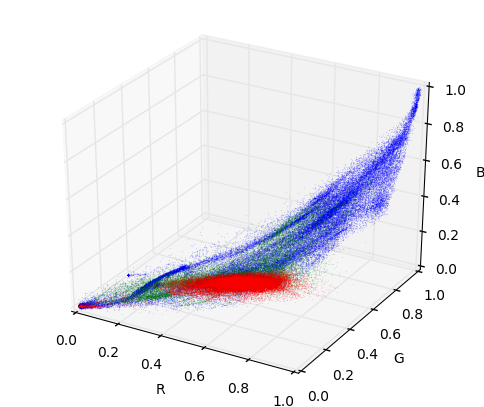

In [5]:
# train the EM model
m = 3
em = EM(m=m, threshold=0.00001, maxIter=100)

em.train(x)

# get all parameters
w, mu, sigma, logLikelihood = em.get_params()
# get the label
label = em.get_label()

# plot the likelihood
plt.figure(figsize=(5, 4))
plt.plot(logLikelihood, 'o-', markersize=3)
plt.show()

# plot the clustered data
# %matplotlib qt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', color=colors[i], 
            markersize=1, alpha=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.legend()
plt.show()

In [6]:
print('w:\n', np.round(w, 5))
print('\nmu:\n', np.round(mu, 5))
print('\nsigma:\n', np.round(sigma, 5))

w:
 [ 0.39011  0.18388  0.42601]

mu:
 [[ 0.63713  0.49417  0.34339]
 [ 0.44932  0.44483  0.11028]
 [ 0.36729  0.41148  0.00073]]

sigma:
 [[[ 0.07508  0.06457  0.05332]
  [ 0.06457  0.05825  0.05127]
  [ 0.05332  0.05127  0.04974]]

 [[ 0.03767  0.02527  0.01867]
  [ 0.02527  0.02451  0.00872]
  [ 0.01867  0.00872  0.01841]]

 [[ 0.03579  0.03694 -0.00027]
  [ 0.03694  0.04149 -0.0003 ]
  [-0.00027 -0.0003   0.     ]]]


## 5 mixtures

Break, reach the threshold at 21 th iteration !


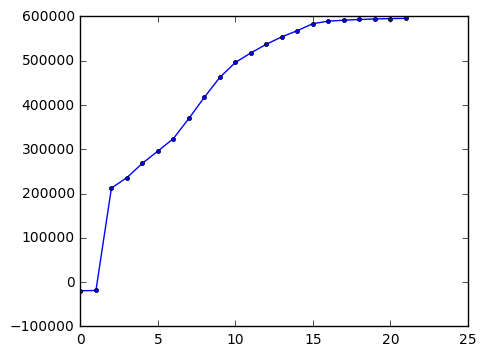

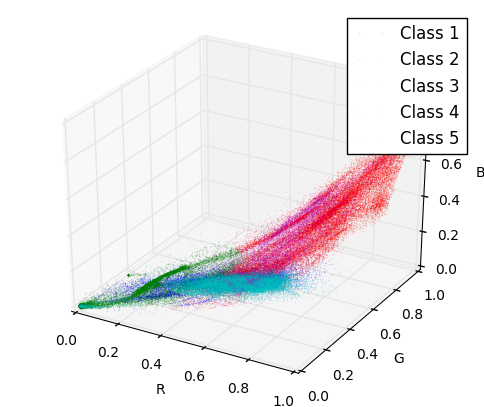

In [7]:
# train the EM model
m = 5
em = EM(m=m, threshold=0.001, maxIter=100)

em.train(x)

# get all parameters
w, mu, sigma, logLikelihood = em.get_params()
# get the label
label = em.get_label()

# plot the likelihood
plt.figure(figsize=(5, 4))
plt.plot(logLikelihood, 'o-', markersize=3)
plt.show()

# plot the clustered data
# %matplotlib qt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', color=colors[i], 
            markersize=1, alpha=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()
plt.show()

## 10 mixtures

In [12]:
# train the EM model
m = 10
em = EM(m=m, threshold=0.001, maxIter=100)

em.train(x)

# get all parameters
w, mu, sigma, logLikelihood = em.get_params()
# get the label
label = em.get_label()

# plot the likelihood
plt.figure(figsize=(6, 5))
plt.plot(logLikelihood, 'o-', markersize=3)
plt.show()

# plot the clustered data
# %matplotlib qt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', color=colors[i], 
            markersize=1, alpha=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.legend(fontsize=8)
plt.show()

LinAlgError: Singular matrix

## Self figure

In [17]:
# read the image
img = plt.imread('./self.jpg') / 255

# reshape the input vector
x = np.reshape(img, (-1, 3)) 

Break, reach the threshold at 25 th iteration !


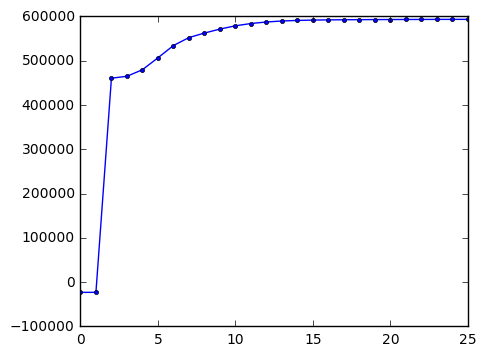

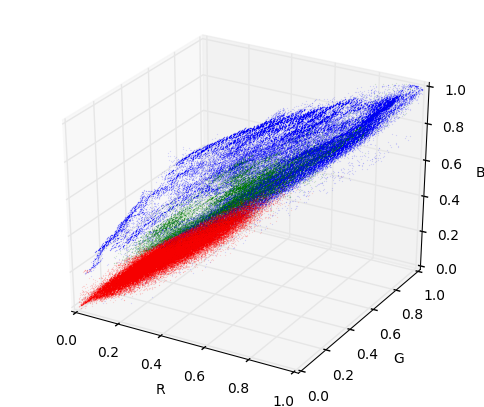

In [22]:
# train the EM model
m = 3
em = EM(m=m, threshold=0.0001, maxIter=100)

em.train(x)

# get all parameters
w, mu, sigma, logLikelihood = em.get_params()
# get the label
label = em.get_label()

# plot the likelihood
plt.figure(figsize=(5, 4))
plt.plot(logLikelihood, 'o-', markersize=3)
plt.show()

# plot the clustered data
# %matplotlib qt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', color=colors[i], 
            markersize=1, alpha=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.legend()
plt.show()

Break, reach the threshold at 22 th iteration !


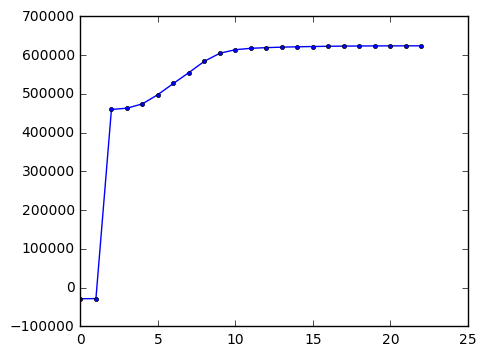

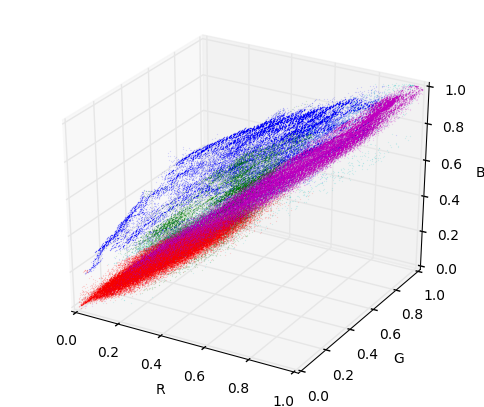

In [21]:
# train the EM model
m = 5
em = EM(m=m, threshold=0.0001, maxIter=100)

em.train(x)

# get all parameters
w, mu, sigma, logLikelihood = em.get_params()
# get the label
label = em.get_label()

# plot the likelihood
plt.figure(figsize=(5, 4))
plt.plot(logLikelihood, 'o-', markersize=3)
plt.show()

# plot the clustered data
# %matplotlib qt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', color=colors[i], 
            markersize=1, alpha=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.legend()
plt.show()